# Ford GoBike Data Exploration
## by Dilek Dervishogullari

In this notebook, I am doing Univariate, Bivariate, Multivariate explorations on the Ford GoBike data for the year of 2018. My purpose is to investigate which variable(s) has the most effect on trip duration of the users.

## Table of Contents

<ul>
<li><a href="#wrangle">Preliminary Wrangling</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
<li><a href="#conclusion">Conclusion</a></li>    
</ul>

<a id='wrangle'></a>
## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in 2018.

In [19]:
# import all packages and set plots to be embedded inline
from requests import get
from io import BytesIO
from zipfile import ZipFile
from os import listdir 
from datetime import date

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [20]:
# create an empty folder to store the files
folder_name_of_csvs = 'trip_data_files'

In [21]:
# extract zip files from the url containing data
for month in range(1,13):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    bike_data_url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    response = get(bike_data_url)
        
    # code below opens zip file; BytesIO returns a readable and writeable view of the contents;
    unzipped_file = ZipFile(BytesIO(response.content))
        
    # puts extracted zip file into folder trip_data_files
    unzipped_file.extractall(folder_name_of_csvs)

In [22]:
# combine all locally saved csvs into 1 dataframe
list_csvs = []
for file_name in listdir(folder_name_of_csvs):
    list_csvs.append(pd.read_csv(folder_name_of_csvs+'/'+file_name))
df = pd.concat(list_csvs)

/Users/dilocuk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [23]:
# save df into csv format
df.to_csv('data.csv')

In [24]:
# load in the dataset into a pandas dataframe
rides = pd.read_csv('data.csv', index_col=0)

In [25]:
# high-level overview of data shape and composition
print(rides.shape)
print(rides.dtypes)
rides.head(10)

(1863721, 17)
Unnamed: 0.1               float64
bike_id                    float64
bike_share_for_all_trip     object
duration_sec               float64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name            object
end_time                    object
member_birth_year          float64
member_gender               object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name          object
start_time                  object
user_type                   object
dtype: object


,Unnamed: 0.1,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,NaN,1035.0,No,598.0,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.1870,1988.0,Male,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-02-28 23:59:47.0970,Subscriber
1,NaN,1673.0,No,943.0,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.9740,1987.0,Male,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2018-02-28 23:21:16.4950,Customer
2,NaN,3498.0,No,18587.0,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.9250,1986.0,Female,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:55.1900,Customer
3,NaN,3129.0,No,18558.0,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.4500,1981.0,Male,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:53.6210,Customer
4,NaN,1839.0,Yes,885.0,297.0,37.322980,-121.887931,Locust St at Grant St,2018-02-28 23:29:58.6080,1976.0,Female,308.0,37.336802,-121.894090,San Pedro Square,2018-02-28 23:15:12.8580,Subscriber
5,NaN,2656.0,No,921.0,288.0,37.350964,-121.902016,Mission St at 1st St,2018-02-28 23:29:40.4370,1997.0,Male,312.0,37.329732,-121.901782,San Jose Diridon Station,2018-02-28 23:14:19.1700,Customer
6,NaN,1616.0,No,277.0,310.0,37.335885,-121.885660,San Fernando St at 4th St,2018-02-28 23:26:27.2220,1957.0,Female,316.0,37.330165,-121.885831,San Salvador St at 1st St,2018-02-28 23:21:49.2740,Subscriber
7,NaN,144.0,No,285.0,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2018-02-28 23:26:05.4050,1990.0,Female,198.0,37.807813,-122.264496,Snow Park,2018-02-28 23:21:19.6310,Subscriber
8,NaN,3351.0,No,363.0,189.0,37.839649,-122.271756,Genoa St at 55th St,2018-02-28 23:25:22.2740,1975.0,Male,176.0,37.828410,-122.266315,MacArthur BART Station,2018-02-28 23:19:18.6060,Subscriber
9,NaN,1699.0,Yes,226.0,327.0,37.332039,-121.881766,5th St at San Salvador St,2018-02-28 23:19:06.6200,1996.0,Male,295.0,37.332794,-121.875926,William St at 10th St,2018-02-28 23:15:20.0330,Subscriber


In [26]:

# remove unncecessary columns that are not relevant to the analysis: start_station_latitude, start_station_longitude,
# end_station_latitude, end_station_longitude, bike_share_for_all_trip
rides = rides.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip'], axis=1)

In [27]:
# convert member_gender column to category
rides['member_gender'] = rides['member_gender'].astype('category')

In [28]:
# test the cleaning steps
print(rides.shape)
print(rides.dtypes)
print(rides.describe())
rides.head(10)

(1863721, 12)
Unnamed: 0.1           float64
bike_id                float64
duration_sec           float64
end_station_id         float64
end_station_name        object
end_time                object
member_birth_year      float64
member_gender         category
start_station_id       float64
start_station_name      object
start_time              object
user_type               object
dtype: object
       Unnamed: 0.1       bike_id  duration_sec  end_station_id  \
count           0.0  1.863721e+06  1.863721e+06    1.851950e+06   
mean            NaN  2.296851e+03  8.573026e+02    1.181730e+02   
std             NaN  1.287733e+03  2.370379e+03    1.004403e+02   
min             NaN  1.100000e+01  6.100000e+01    3.000000e+00   
25%             NaN  1.225000e+03  3.500000e+02    3.000000e+01   
50%             NaN  2.338000e+03  5.560000e+02    8.800000e+01   
75%             NaN  3.333000e+03  8.720000e+02    1.830000e+02   
max             NaN  6.234000e+03  8.636600e+04    3.810000e+02 

,Unnamed: 0.1,bike_id,duration_sec,end_station_id,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_name,start_time,user_type
0,NaN,1035.0,598.0,114.0,Rhode Island St at 17th St,2018-03-01 00:09:45.1870,1988.0,Male,284.0,Yerba Buena Center for the Arts (Howard St at ...,2018-02-28 23:59:47.0970,Subscriber
1,NaN,1673.0,943.0,324.0,Union Square (Powell St at Post St),2018-02-28 23:36:59.9740,1987.0,Male,6.0,The Embarcadero at Sansome St,2018-02-28 23:21:16.4950,Customer
2,NaN,3498.0,18587.0,15.0,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.9250,1986.0,Female,93.0,4th St at Mission Bay Blvd S,2018-02-28 18:20:55.1900,Customer
3,NaN,3129.0,18558.0,15.0,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.4500,1981.0,Male,93.0,4th St at Mission Bay Blvd S,2018-02-28 18:20:53.6210,Customer
4,NaN,1839.0,885.0,297.0,Locust St at Grant St,2018-02-28 23:29:58.6080,1976.0,Female,308.0,San Pedro Square,2018-02-28 23:15:12.8580,Subscriber
5,NaN,2656.0,921.0,288.0,Mission St at 1st St,2018-02-28 23:29:40.4370,1997.0,Male,312.0,San Jose Diridon Station,2018-02-28 23:14:19.1700,Customer
6,NaN,1616.0,277.0,310.0,San Fernando St at 4th St,2018-02-28 23:26:27.2220,1957.0,Female,316.0,San Salvador St at 1st St,2018-02-28 23:21:49.2740,Subscriber
7,NaN,144.0,285.0,196.0,Grand Ave at Perkins St,2018-02-28 23:26:05.4050,1990.0,Female,198.0,Snow Park,2018-02-28 23:21:19.6310,Subscriber
8,NaN,3351.0,363.0,189.0,Genoa St at 55th St,2018-02-28 23:25:22.2740,1975.0,Male,176.0,MacArthur BART Station,2018-02-28 23:19:18.6060,Subscriber
9,NaN,1699.0,226.0,327.0,5th St at San Salvador St,2018-02-28 23:19:06.6200,1996.0,Male,295.0,William St at 10th St,2018-02-28 23:15:20.0330,Subscriber


### What is the structure of your dataset?

> There are 1,863,721 ride data from 2018 in the dataset with 11 features (ride duration, start and end time, start station id and name, end station id and name, bike id, customer type, birth year, and gender). Most variables are string. I got rid of the columns I will not be needing for the analysis. 


### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the duration of the trip. Here are some questions I wish to answer:
1. How long does average trip take?
2. Does User Type (Subscriber or Customer) affect the duration?
3. Do Age and Sex of the user affect the duration?
4. Does season (time of the year) affect the duration?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that season will have the strongest effect on each ride's duration: the colder the season (Winter time), the lower the duration. I also think that the other features: user type, age, and sex, will have effects on the duration, though to a much smaller degree than the main effect of season.

<a id='univariate'></a>
## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest: duration.

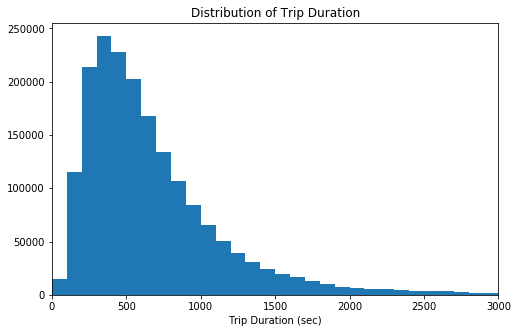

In [29]:
# start with standard-scaled plot
binsize = 100
bins = np.arange(0, rides['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = rides, x = 'duration_sec', bins = bins)
plt.xlim(0, 3000)
plt.xlabel('Trip Duration (sec)')
plt.title('Distribution of Trip Duration')
plt.show();

The distribution is right-skewed, with a really long tail

It was very difficult to view the plot, I had to reduce the bin size to 100 and put a limit of 3000 on x-axis. I will change the trip duration variable to minute instead of second. 

In [30]:
# change trip duration variable from second to minute
rides['duration_min'] = rides['duration_sec'] / 60
rides.drop('duration_sec' , axis = 1 , inplace = True)

I will plot the distribution of trip duration again, but in minutes and with log scale on the x-axis

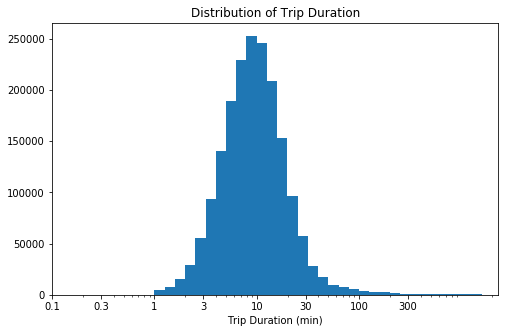

In [31]:
# trip duration distribution in log scale
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(rides['duration_min'].max())+log_binsize, log_binsize)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[8, 5])
plt.hist(data = rides, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (min)')
plt.title('Distribution of Trip Duration')
plt.show();

Trip duration has a long-tailed distribution, with a lot of trips on the low duration end, and few on the high duration end. When plotted on a log-scale, the price distribution looks roughly unimodal, with one peak around 10 minutes.

Next up, the first predictor variable of interest: season. I need to extract the months of the ride first and then bin them into seasons (winter, spring, summer, fall)

In [32]:
# extract the month from start_time column
rides['start_month'] = pd.DatetimeIndex(rides['start_time']).month
rides['start_month'].value_counts()

10    201458
7     199222
6     195968
8     192162
9     186217
5     179125
11    134135
12    131363
4     131169
3     111382
2     106718
1      94802
Name: start_month, dtype: int64

In [33]:
# create 4 seasons category
def season_of_month(month):
    seasons = {'spring': ('3', '4', '5'),
               'summer': ('6', '7', '8'),
               'fall': ('9', '10', '11'),
               'winter': ('12', '1', '2')}
    if month in seasons['spring']:
        return 'spring'
    if month in seasons['summer']:
        return 'summer'
    if month in seasons['fall']:
        return 'fall'
    if month in seasons['winter']:
        return 'winter'

rides['start_month'] = rides['start_month'].astype(str)
rides['season'] = rides.start_month.map(season_of_month)
rides.sample(10)

,Unnamed: 0.1,bike_id,end_station_id,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_name,start_time,user_type,duration_min,start_month,season
169838,NaN,4451.0,3.0,Powell St BART Station (Market St at 4th St),2018-09-04 19:12:58.8410,1965.0,Male,75.0,Market St at Franklin St,2018-09-04 19:02:35.8630,Subscriber,10.366667,9,fall
111338,NaN,282.0,30.0,San Francisco Caltrain (Townsend St at 4th St),2018-11-05 07:32:14.4410,1952.0,Male,6.0,The Embarcadero at Sansome St,2018-11-05 07:15:37.4030,Subscriber,16.616667,11,fall
85225,NaN,4404.0,6.0,The Embarcadero at Sansome St,2018-12-11 09:35:35.8020,1966.0,Male,81.0,Berry St at 4th St,2018-12-11 09:22:57.4060,Subscriber,12.633333,12,winter
89278,NaN,546.0,59.0,S Van Ness Ave at Market St,2018-06-18 08:29:19.5840,1967.0,Male,67.0,San Francisco Caltrain Station 2 (Townsend St...,2018-06-18 08:14:30.1550,Subscriber,14.816667,6,summer
190411,NaN,3005.0,44.0,Civic Center/UN Plaza BART Station (Market St ...,2018-07-02 18:56:45.9240,1985.0,Male,79.0,7th St at Brannan St,2018-07-02 18:46:53.7120,Subscriber,9.866667,7,summer
22835,NaN,5263.0,148.0,Horton St at 40th St,2018-12-23 10:36:03.6340,1987.0,Male,182.0,19th Street BART Station,2018-12-23 10:24:06.7630,Subscriber,11.933333,12,winter
28907,NaN,635.0,58.0,Market St at 10th St,2018-05-26 18:50:55.3220,NaN,NaN,323.0,Broadway at Kearny,2018-05-26 18:11:45.9260,Customer,39.150000,5,spring
131194,NaN,2667.0,266.0,Parker St at Fulton St,2018-06-11 17:17:04.1480,1993.0,Female,245.0,Downtown Berkeley BART,2018-06-11 17:10:52.4380,Subscriber,6.183333,6,summer
78274,NaN,3328.0,88.0,11th St at Bryant St,2018-10-19 09:48:42.7170,1989.0,Male,43.0,San Francisco Public Library (Grove St at Hyde...,2018-10-19 09:42:45.1670,Subscriber,5.950000,10,fall
74304,NaN,2483.0,171.0,Rockridge BART Station,2018-06-20 08:29:23.2010,1988.0,Male,267.0,Derby St at College Ave,2018-06-20 08:23:47.1150,Subscriber,5.600000,6,summer


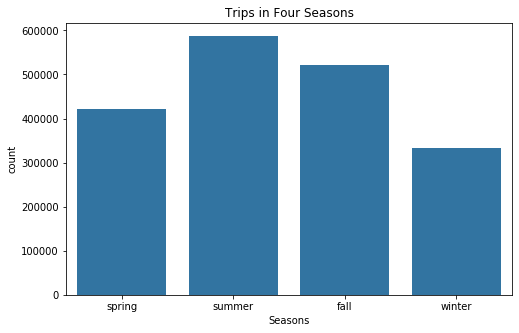

In [34]:
# convert season column in order
level_order = ['spring', 'summer', 'fall', 'winter']
ordered_season = pd.api.types.CategoricalDtype(ordered = True, categories=level_order)
rides['season'] = rides['season'].astype(ordered_season)

# plot distribution of season
plt.figure(figsize=[8, 5])

base_color = sb.color_palette()[0]
sb.countplot(data = rides, x = 'season', color = base_color)
plt.title('Trips in Four Seasons')
plt.xlabel('Seasons')

plt.show()

Users ride more in Summer and Fall seasons where the weather is not too cold and as expected, users ride the least in the cold winter. But, does more rides mean more duration? I will look at this relationship in Bivariate Exploration section.

I will take a look on the distribution of type of users (subscriber or customer)

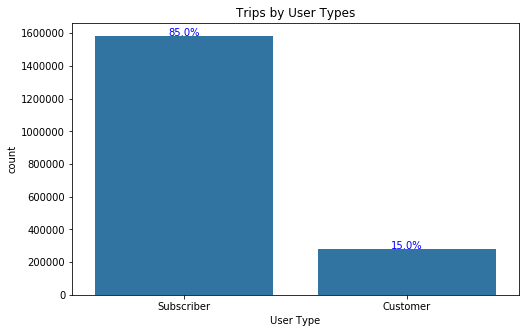

In [35]:
# plot distribution of user type
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = rides, x = 'user_type', color = base_color)

n_points = rides.shape[0]
user_counts = rides['user_type'].value_counts()
locs, labels = plt.xticks()

# print frequency on the bar chart
for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center', color='b')

plt.title('Trips by User Types')
plt.xlabel('User Type')

plt.show()

85% of the users in 2018 were Subscriber or Member, while the rest (15%) were Customer or just Casual.

The last variables that I want to look at are age and gender of the users.

In [36]:
# calculate age of each user
def calculate_age(born):
    today = date.today()
    return today.year - born

rides['age'] = rides.member_birth_year.map(calculate_age)

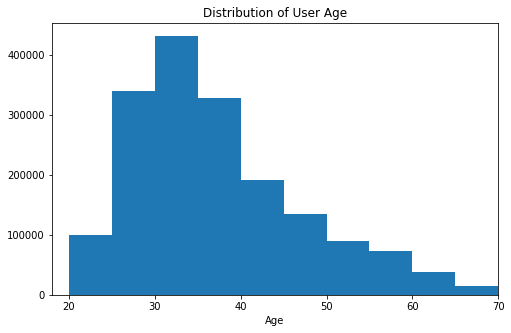

In [37]:
# plot distribution of age
plt.figure(figsize = [8, 5])

binsize = 5
bins = np.arange(0, rides['age'].max()+binsize, binsize)

plt.hist(data = rides, x = 'age', bins = bins)
plt.xlim(18, 70)
plt.xlabel('Age')
plt.title('Distribution of User Age')
plt.show()

The distribution is right-skewed with the peak at between 30 to 35 and as age gets higher, user count decreases.

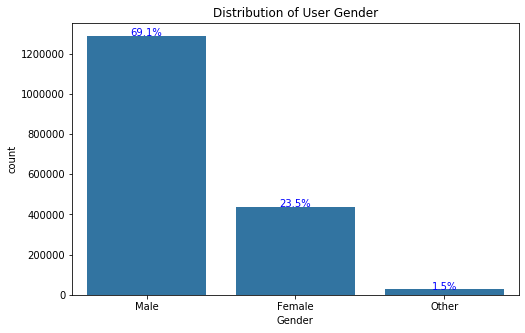

In [38]:
# plot distribution of gender
plt.figure(figsize=[8, 5])

base_color = sb.color_palette()[0]
gen_order = rides['member_gender'].value_counts().index
sb.countplot(data = rides, x = 'member_gender', color = base_color, order=gen_order)
plt.title('Distribution of User Gender')
plt.xlabel('Gender')

# print frequency on the bar chart
n_points = rides.shape[0]
gender_counts = rides['member_gender'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = gender_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center', color='b')

plt.show()

Almost 70% of the users are male and 23% of the users are female.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked unimodal, with one peak around 10 minutes.

> The other variables (season, user type, age, and gender) were as I expected with male subscriber age 30-35 in summer as the highest count from these variables.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I changed the duration variable from seconds to minutes because seconds are just too unreasonable to measure a trip duration. I also engineered new variables: season and age from existing variabes.

<a id='bivariate'></a>
## Bivariate Exploration

> To start off with, I want to look at how trip duration is affected by month and season

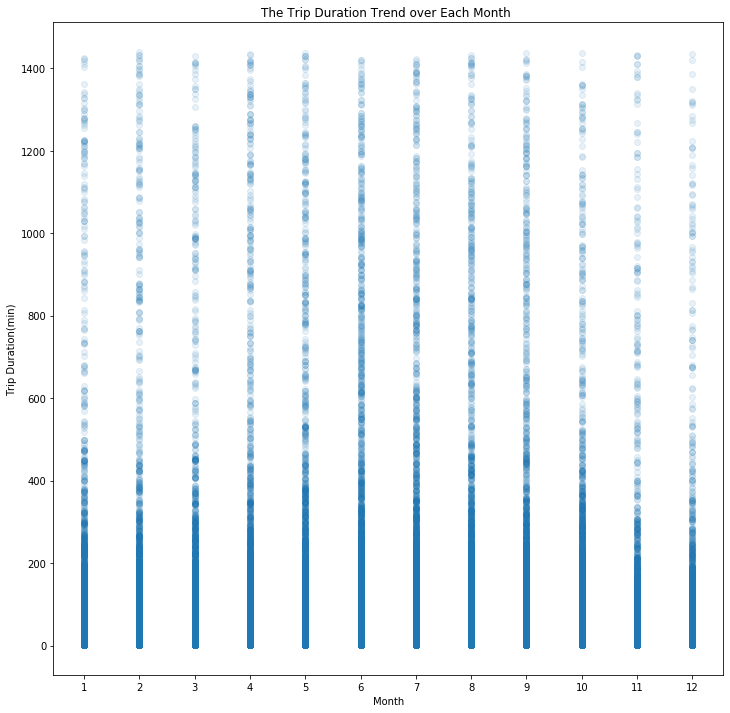

In [39]:
# convert month column back to integer
rides['start_month'] = rides['start_month'].astype(int)

# check the trip duration over each month.
plt.figure(figsize = [12,12])
plt.scatter(data = rides, x = 'start_month' , y = 'duration_min' , alpha = 0.1)
tick_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.xticks(tick_labels, tick_labels)
plt.title('The Trip Duration Trend over Each Month ')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');

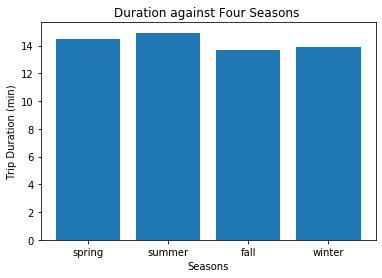

In [40]:
# check the trip duration over each season
spring_dur = rides.query("season == 'spring'").duration_min.mean ()
summer_dur = rides.query("season == 'summer'").duration_min.mean()
fall_dur = rides.query("season == 'fall'").duration_min.mean()
winter_dur = rides.query("season == 'winter'").duration_min.mean()

plt.bar(['spring','summer','fall','winter'],[spring_dur , summer_dur , fall_dur , winter_dur] )
plt.title('Duration against Four Seasons ')
plt.xlabel('Seasons')
plt.ylabel('Trip Duration (min)');

From the month vs duration scatter plot, June to August of 2018 has the longest duration, while November and December of 2018 has the shortest duration, as expected.

From the season vs duration bar plot, again, I saw that Summer has the longest trip duration , with average above 14 mins. However, surprisingly, Fall has the lowest trip duration, even lower than Winter, even though Fall season usually has the best weather in SF. After checking the weather data in Fall 2018, I remembered about the Wildfires in Northern California that happened in Nov 2018 which caused low air quality in SF, thus this might cause a decrease in users riding GoBike.

Other than that, there is no significant difference of trip duration in between the four seasons. It is probably because the weather in San Francisco bay area does not fluctuate to the extremes (snow or heat wave).

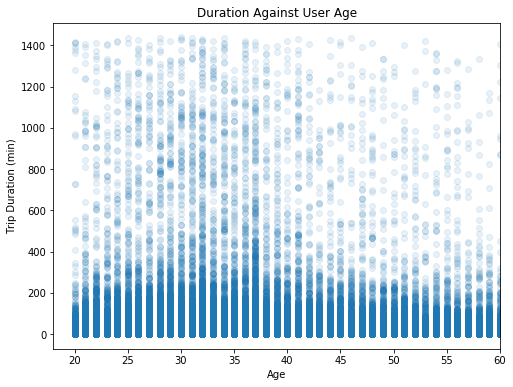

In [41]:
# scatter plot of duration vs. age
plt.figure(figsize = [8, 6])
plt.scatter(data = rides, x = 'age', y = 'duration_min', alpha = 1/10)
plt.xlabel('Age')
plt.xlim(18, 60)
plt.ylabel('Trip Duration (min)')
plt.title('Duration Against User Age')
plt.show()

Users with age of 31 and 36 seem to have the highest trip duration and as the users get older, the trip duration becomes less.

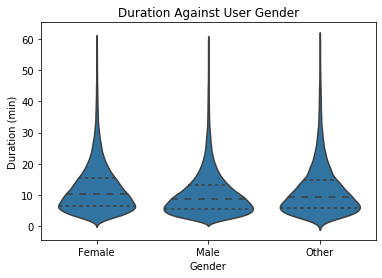

In [42]:
# query the data for duration only below 1 hour to focus the data
rides_dur = rides.query("duration_min < 60")

# plot relationship between gender and duration
base_color = sb.color_palette()[0]
sb.violinplot(data=rides_dur, x='member_gender', y='duration_min', color=base_color, inner='quartile')
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
plt.title('Duration Against User Gender');

Although in previous section it was shown that 70% of the users were male, but the trip duration does not seem to be affected by the user gender. The violin plots look similar for these 3 gender categories, with the median all similar (around 10 minutes).

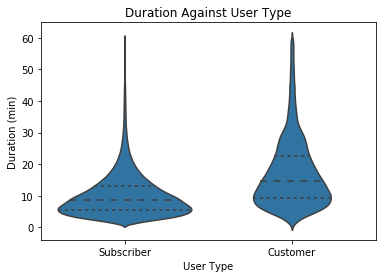

In [43]:
# plot relationship between user type and duration
base_color = sb.color_palette()[0]
sb.violinplot(data=rides_dur, x='user_type', y='duration_min', color=base_color, inner='quartile')
plt.xlabel('User Type')
plt.ylabel('Duration (min)')
plt.title('Duration Against User Type');

Subscriber users tend to ride the bikes in lesser duration than customer users. This might be because the subscriber users ride the bikes for regular commutes (work, school, etc.), but the customer users might be tourists that use the bikes for traveling around town.

In [44]:
# categorize the variables into number and categorical for a plot matrix
numeric_vars = ['duration_min', 'age']
categoric_vars = ['season', 'member_gender', 'user_type']

/Users/dilocuk/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/Users/dilocuk/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

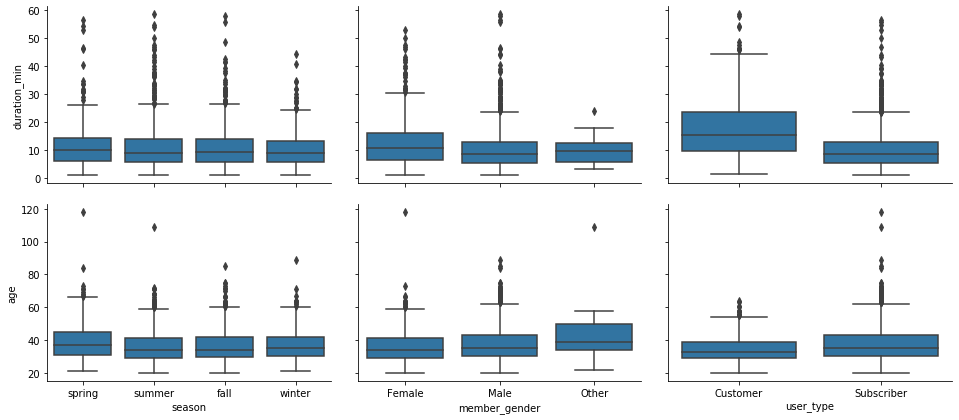

In [45]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(rides_dur.shape[0], 2000, replace = False)
rides_samp = rides_dur.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = rides_samp, y_vars = numeric_vars, x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Duration had a surprisingly low amount of correlation with the season. There is no significant difference between the duration in each season. This might be caused by the 'constant' temperature in SF area, unlike other cities with extreme temperature changes (for example New York). I also suspected that due to high frequency of subscriber users compared to customer, the riders were all regular users who need to use the bikes for their commutes regardless of the weather. 

> There was also an interesting relationship observed between duration and the categorical features. For genders, the trip duration does not seem to differ between Female, Male, and Other. For user type, Customer type has more trip duration than Subscriber type, and this is caused by the regularities in Subscriber trips, while Customer trips might be more random.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is not interesting relationship between other feature. The relationship between user age and the categorial variables do not seem to have any significant difference.

<a id='multivariate'></a>
## Multivariate Exploration

> I want to investigate on the relationship between the trip duration and the age and gender of the users.

> Age from 18 to 56 takes 95% of the users. So, it's logical to remove users more than 60 years old. There were users more than 100 years old. I searched at Ford sign in webpage and realized they allow users to put some unusual birth year, such as 1918.

In [46]:
# remove users more than 60 years old
rides_age = rides_dur[rides_dur['age']<=60]

# generate a new field for member age group
rides_age['member_age_bins'] = rides_age['age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

/Users/dilocuk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


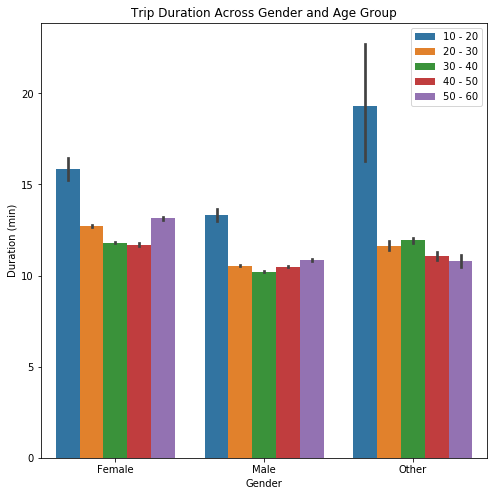

In [47]:
# create bar plot on gender versus duration on levels of the age bins variable
plt.figure(figsize = [8, 8])

ax = sb.barplot(x='member_gender', y = 'duration_min', hue='member_age_bins', data=rides_age.sort_values(by= 'member_age_bins'))
plt.title('Trip Duration Across Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
leg = ax.legend()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In all gender types, the age range of 10-20 has the longest trip duration, this is maybe due to the young age still has more stamina, so they tend to ride the bikes longer either for recreation or for school.

### Were there any interesting or surprising interactions between features?

> My biggest surprise was that the second longest trip duration in female and male actually belongs to the 50-60 age group. I would have thought that Users with age 20-30 would have the longest duration. My assumption is maybe the Age Group of 50-60 would ride in slower speed than 20-30 year olds and would need longer duration to reach their destinations.

<a id='conclusion'></a>
## Conclusion

1. In 2018, the average trip duration that the users took was around 10 minutes. The trips were mostly in Summer season (between June - August) and most trips were taken by males. 85% of the total trips were taken by Subscribers, which are members of the GoBike program. Also, the age group with the most trips was between 30-35 years old.
2. There was no significant difference between the seasons and the trip duration, but there was a low durations in Fall season due to the bad air quality caused by Northern California wildfires in November 2018.
3. The Customers users (casual users) usually took more time in their rides than Subscribers.
4. All gender types (male, female, other) with age range of 10-20 took the longest trip duration in average and surprisingly, in the male and female categories, age range of 50-60 took the second longest trip duration.

In [48]:
# save all changes made to a new csv
rides.to_csv('rides_clean.csv', 
                 index=False, encoding = 'utf-8')